In [1]:
import numpy as np
import sncosmo
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy import constants as const
import sys
sys.path.append('../')
from scripts import tde_utils

In [2]:
import seaborn as sns
sns.set_context('paper')

In [3]:
roman_filters = ['f062', 'f087', 
                 'f106', 'f129', 
                 'f158', 'f184', 
                 'f213', 'f146']

color_dict = {f: f'C{i}' for i, f in enumerate(roman_filters)}

hour_limits = [28.5, 28.2, 28.1, 28.0, 28.0, 27.4, 26.2, 28.4] # 1 hour point source limits
minute_limits = [25.5, 25.1, 25.1, 25.0, 24.9, 24.4, 23.7, 25.9]

roman_limits = dict(zip(roman_filters, hour_limits))

In [4]:
def d_maglim(z, args):
    try:
        filt, maglim = args
        source = tde_utils.BlackBodySource(30000)
        bb_model = sncosmo.Model(source=source)
        bb_model.set(z=z)
        luminosity_distance = cosmo.luminosity_distance(z)
        
        filter_abs_mag = bb_model.bandmag(filt, 'ab', 0)
        app_mag = filter_abs_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
        #print(np.abs(app_mag - (maglim-1)))
        return np.abs(app_mag - (maglim-0.5))
    except:
        return 1000

In [5]:
# snia_model = sncosmo.Model(source='snemo15')
# print(snia_model.minwave(), snia_model.maxwave())
# snia_model = sncosmo.Model(source='salt2')
# print(snia_model.minwave(), snia_model.maxwave())
# snia_model = sncosmo.Model(source='sugar')
# print(snia_model.minwave(), snia_model.maxwave())
# snia_model = sncosmo.Model(source='salt3')
# print(snia_model.minwave(), snia_model.maxwave())

In [6]:
def d_snia_maglim(z, args):
    try:
        filt, maglim = args
        snia_model = sncosmo.Model(source='salt3')
        snia_model.set(z=z)
        snia_model.set(x1=0, x0=1051627384124.3574, c=0, t0=0)
        luminosity_distance = cosmo.luminosity_distance(z)

        filter_abs_mag = snia_model.bandmag(filt, 'ab', 0)
        app_mag = filter_abs_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
        return np.abs(app_mag - (maglim-1))
    except Exception as e:
        print('z = ', z)
        print(e)
        return 100

In [7]:
from scipy.optimize import minimize

#res = minimize(d_maglim, args = ['f146', 28.4], x0=4)

In [8]:
z_lims = []
for filt in roman_filters:
    res = minimize(d_maglim, 
                   args = [filt, roman_limits[filt]], 
                   bounds = [[0.01, 10]],
                   x0=2)
    z_lims.append(res.x)

### How far can Roman detect TDEs 1 mag brighter than their host?

In [9]:
zlims = dict(zip(roman_filters, z_lims))
zlims

{'f062': array([7.48117356]),
 'f087': array([8.84373879]),
 'f106': array([9.76212107]),
 'f129': array([10.]),
 'f158': array([10.]),
 'f184': array([8.56442958]),
 'f213': array([1.42412628]),
 'f146': array([10.])}

In [10]:
def calc_volume(sq_degrees, z):
    
    sphere_area_sterad = 4*np.pi
    sphere_area_degrees = sphere_area_sterad * ((180/np.pi)**2)
    fractional_area = sq_degrees / sphere_area_degrees

    total_volume = cosmo.comoving_volume(z)
    
    return total_volume * fractional_area

In [11]:
## TDE Rate: 5×10−8/𝑦𝑟/𝑀𝑝𝑐3
tde_rate = (5e-8 * u.year**(-1) * u.Mpc**(-3))

# white paper for roman time domain high lattitude

Short 1pgrph science pitch due Feb 17
Longer white paper late spring

# Table with:
- Filter, 
- Depth assumed, 
- Max z for TDEs, 
- Max z for SNe Ia, 
- Corresponding volume for TDEs / deg^2, 
- volume for Ias, 
- Number of TDEs / deg^2 / yr
- Number of Ia / deg^2 / yr
- Number of TDEs / deg^2 / yr beyond z=6

Do Roman, JWST, LSST

In [12]:
tde_rate * calc_volume(1700, zlims['f146'])

<Quantity [7844.91888904] 1 / yr>

# High lattitude time domain survey
- Split into wide tier (19 sq degree area, 100 sec exposure) and deep tier (4.2 sq degree, 300 sec exposure)

### Wide

In [13]:
# https://arxiv.org/pdf/2111.03081.pdf
high_lattitude_wide_filters = ['f062', 'f087', 'f106', 'f129']

wide_limits = [26.4, 25.6, 25.5, 25.4] # 125 exposure co-add limits
wide_coadd_limits = np.array(wide_limits) + 2.5*np.log10(np.sqrt(3))

hl_wide_limits = dict(zip(high_lattitude_wide_filters, wide_limits))

In [14]:
z_lims = []
for filt in high_lattitude_wide_filters:
    res = minimize(d_maglim, 
                   args = [filt, hl_wide_limits[filt]], 
                   bounds = [[0.01, 10]],
                   x0=2)
    z_lims.append(res.x)
wide_zlims = dict(zip(high_lattitude_wide_filters, z_lims))
wide_zlims

{'f062': array([4.11107653]),
 'f087': array([2.74442822]),
 'f106': array([2.16496353]),
 'f129': array([1.5206752])}

In [15]:
z_lims = []
for filt in high_lattitude_wide_filters:
    res = minimize(d_snia_maglim, 
                   args = [filt, hl_wide_limits[filt]], 
                   bounds = [[0.8, 6]],
                   x0=1.2)
    z_lims.append(res.x)

wide_ia_zlims = dict(zip(high_lattitude_wide_filters, z_lims))
wide_ia_zlims

z =  [5.74965567]
bandpass 'f062' [4600, .., 7900] outside spectral range [13499.3, .., 74246.2]
z =  [5.74965568]
bandpass 'f062' [4600, .., 7900] outside spectral range [13499.3, .., 74246.2]
z =  [5.75396549]
bandpass 'f062' [4600, .., 7900] outside spectral range [13507.9, .., 74293.6]
z =  [5.7539655]
bandpass 'f062' [4600, .., 7900] outside spectral range [13507.9, .., 74293.6]
z =  [3.89441431]
bandpass 'f087' [7300, .., 10150] outside spectral range [9788.83, .., 53838.6]
z =  [3.89441432]
bandpass 'f087' [7300, .., 10150] outside spectral range [9788.83, .., 53838.6]
z =  [5.13416368]
bandpass 'f087' [7300, .., 10150] outside spectral range [12268.3, .., 67475.8]
z =  [5.13416369]
bandpass 'f087' [7300, .., 10150] outside spectral range [12268.3, .., 67475.8]


{'f062': array([1.06771064]),
 'f087': array([1.28440387]),
 'f106': array([1.3480252]),
 'f129': array([1.24051795])}

In [16]:
zs = np.linspace(0.4, wide_zlims['f062'], 80)
angular_rates = []

for z in zs:
    volume = calc_volume(19, z)
    rate = tde_rate * volume
    angular_rates.append(rate.value / 19)

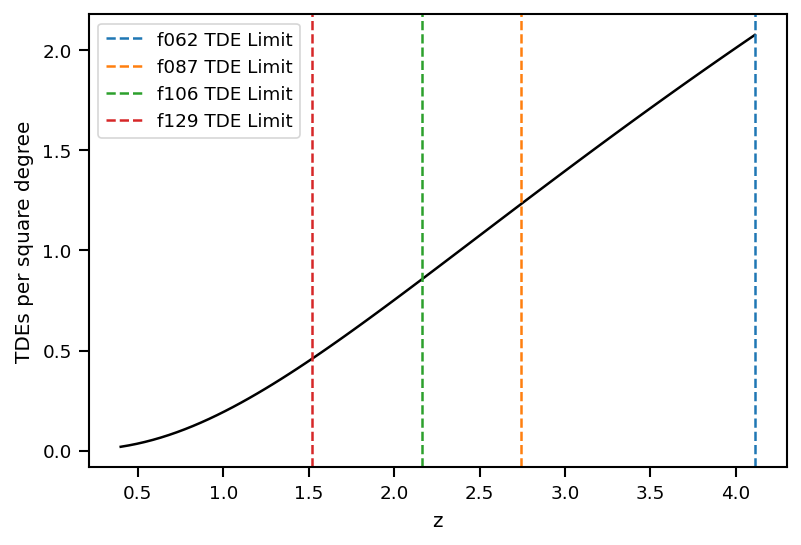

In [17]:
plt.figure(dpi = 150)


plt.plot(zs, angular_rates, c = 'k')
for filt in high_lattitude_wide_filters:
    plt.axvline(wide_zlims[filt], c = color_dict[filt], 
                label = filt + ' TDE Limit', ls = '--')
    
plt.legend()
plt.xlabel('z')
plt.ylabel('TDEs per square degree')
plt.show()

In [18]:
snia_rate = 2.4e-5 * u.year**(-1) * u.Mpc**(-3) # https://arxiv.org/abs/1903.08580

In [19]:
angular_snia_rates = []

ia_zs = np.linspace(0.4, wide_ia_zlims['f106'], 80)

for z in ia_zs:
    volume = calc_volume(19, z)
    rate = snia_rate * volume
    angular_snia_rates.append(rate.value / 19)
    

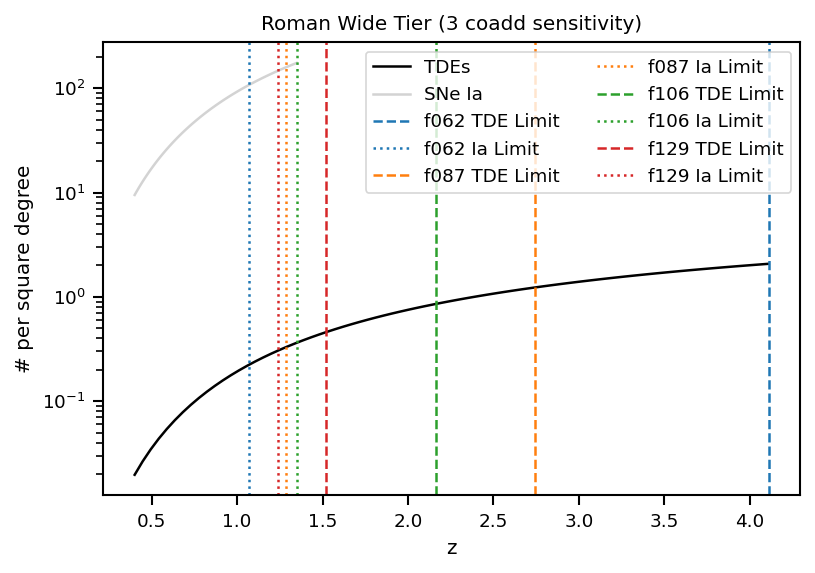

In [20]:
plt.figure(dpi = 150)


plt.plot(zs, angular_rates, c = 'k', label = 'TDEs')
plt.plot(ia_zs, angular_snia_rates, c = 'lightgrey', label = 'SNe Ia')
for filt in high_lattitude_wide_filters:
    plt.axvline(wide_zlims[filt], c = color_dict[filt], 
                label = filt + ' TDE Limit', ls = '--')
    plt.axvline(wide_ia_zlims[filt], c = color_dict[filt], 
                label = filt + ' Ia Limit', ls = 'dotted')
    
    
plt.legend(ncol=2)
plt.xlabel('z')
plt.ylabel('# per square degree')
plt.yscale('log')
plt.title('Roman Wide Tier (3 coadd sensitivity)')
#plt.savefig('../figures/wide_tier_rates.png', dpi = 300)
plt.show()

In [21]:
angular_snia_rates[-1]*19 
#degrees for total number, slightly under 19k detection in Table 3 https://arxiv.org/pdf/2111.03081.pdf 

array([3313.05018037])

Expected SNe Ia / year in the wide tier

In [22]:
angular_rates[-1]*19

array([39.44794346])

Expected TDEs / year in the wide tier

### Deep

In [23]:
high_lattitude_deep_filters = ['f106', 'f129', 'f158', 'f184']

deep_limits = [26.7, 26.6, 26.5, 26.7] # single exposure co-add limits
wide_coadd_limits = np.array(wide_limits) + 2.5*np.log10(np.sqrt(3))


hl_deep_limits = dict(zip(high_lattitude_deep_filters, deep_limits))

In [24]:
z_lims = []
for filt in high_lattitude_deep_filters:
    res = minimize(d_maglim, 
                   args = [filt, hl_deep_limits[filt]], 
                   bounds = [[0.01, 10]],
                   x0=5)
    z_lims.append(res.x)
deep_zlims = dict(zip(high_lattitude_deep_filters, z_lims))
deep_zlims

{'f106': array([5.51363534]),
 'f129': array([5.00993951]),
 'f158': array([3.77871764]),
 'f184': array([3.77295214])}

In [25]:
# Matches fig 4

In [26]:
z_lims = []
for filt in high_lattitude_deep_filters:
    res = minimize(d_snia_maglim, 
                   args = [filt, hl_deep_limits[filt]], 
                   bounds = [[0.8, 6]],
                   x0=1.2)
    z_lims.append(res.x)

deep_ia_zlims = dict(zip(high_lattitude_deep_filters, z_lims))
deep_ia_zlims

{'f106': array([1.94098973]),
 'f129': array([2.22507015]),
 'f158': array([2.16178418]),
 'f184': array([2.41515753])}

In [27]:
zs = np.linspace(0.4, deep_zlims['f106'], 80)
angular_rates = []

for z in zs:
    volume = calc_volume(4.2, z)
    rate = tde_rate * volume
    angular_rates.append(rate.value / 4.2)

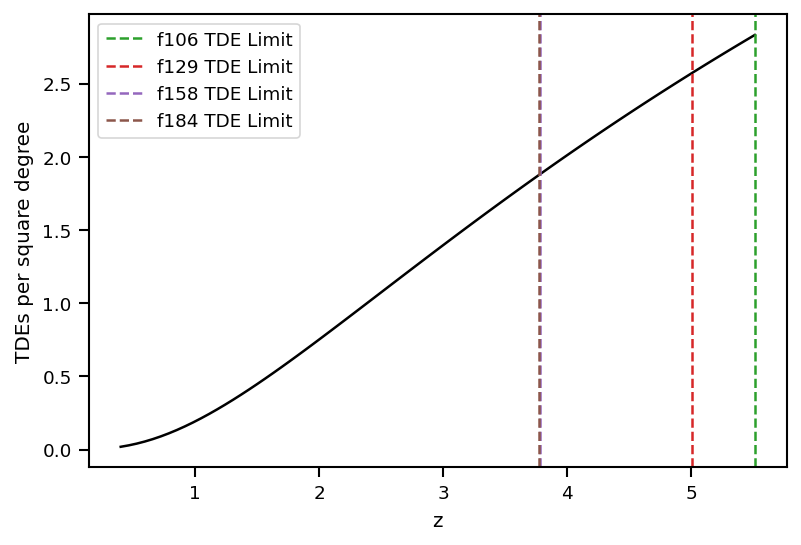

In [28]:
plt.figure(dpi = 150)


plt.plot(zs, angular_rates, c = 'k')
for filt in high_lattitude_deep_filters:
    plt.axvline(deep_zlims[filt], c = color_dict[filt], 
                label = filt + ' TDE Limit', ls = '--')
    
plt.legend()
plt.xlabel('z')
plt.ylabel('TDEs per square degree')
plt.show()

In [29]:
angular_snia_rates = []
ia_zs = np.linspace(0.4, deep_ia_zlims['f106'], 80)


for z in zs:
    volume = calc_volume(4.2, z)
    rate = snia_rate * volume
    angular_snia_rates.append(rate.value / 4.2)

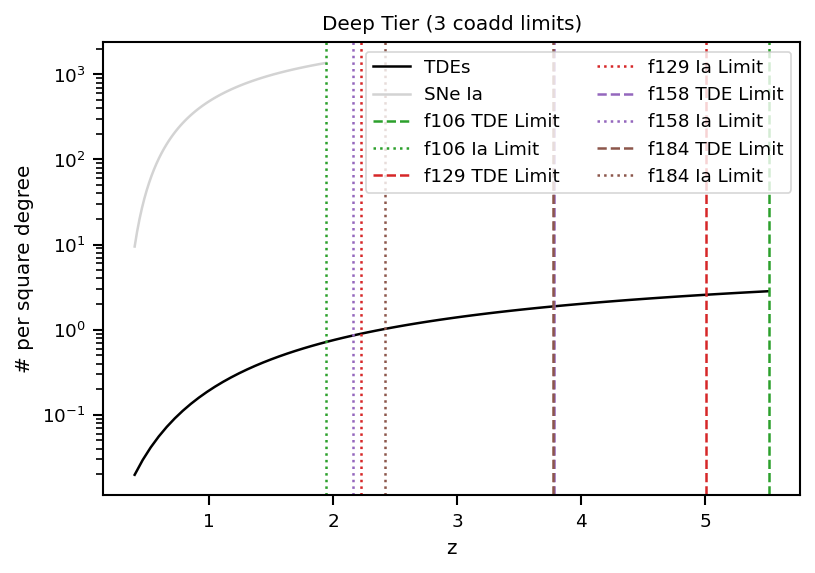

In [30]:
plt.figure(dpi = 150)


plt.plot(zs, angular_rates, c = 'k', label = 'TDEs')
plt.plot(ia_zs, angular_snia_rates, c = 'lightgrey', label = 'SNe Ia')
for filt in high_lattitude_deep_filters:
    plt.axvline(deep_zlims[filt], c = color_dict[filt], 
                label = filt + ' TDE Limit', ls = '--')
    plt.axvline(deep_ia_zlims[filt], c = color_dict[filt], 
                label = filt + ' Ia Limit', ls = 'dotted')
    
    
plt.legend(ncol=2)
plt.xlabel('z')
plt.ylabel('# per square degree')
plt.yscale('log')
plt.title('Deep Tier (3 coadd limits)')
#plt.savefig('../figures/deep_tier_rates.png', dpi = 300)
plt.show()

In [31]:
angular_snia_rates[-1]*4.2

array([5711.02627114])

Expected SNe Ia / year in the deep tier

In [32]:
angular_rates[-1]*4.2

array([11.8979714])

Expected TDEs / year in the deep tier

# JWST

~1700 deg^2 but I can't tell much more than this??

In [33]:
#Mag limit of 28.7 (158), 2deg^2

res = minimize(d_maglim, 
               args = ['f158', 28.7], 
               bounds = [[0.01, 10]],
               x0=2)
res.x

array([10.])

In [34]:
zs = np.linspace(0.4, 5.39, 80)
angular_rates = []

for z in zs:
    volume = calc_volume(2, z)
    rate = tde_rate * volume
    angular_rates.append(rate.value / 2)

Text(0, 0.5, 'TDEs / sq degree / year')

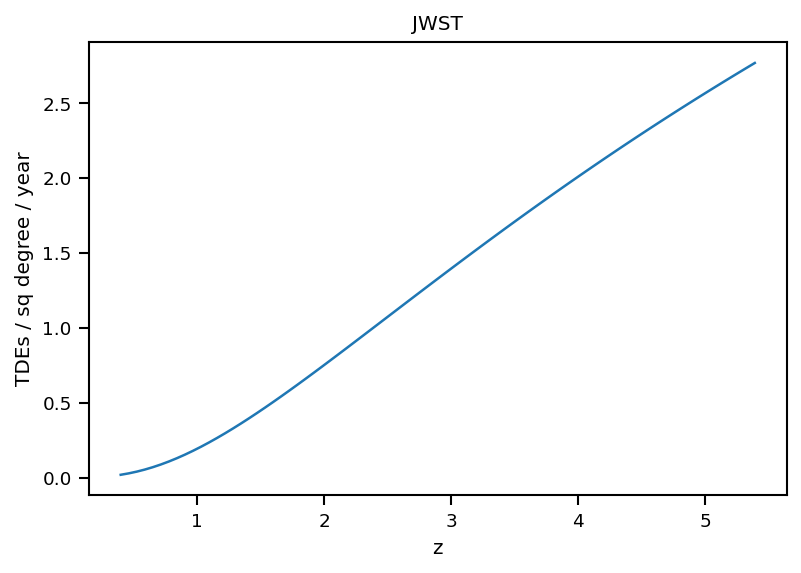

In [35]:
plt.figure(dpi = 150)
plt.plot(zs, angular_rates)
plt.title("JWST")
plt.xlabel('z')
plt.ylabel('TDEs / sq degree / year')

In [36]:
angular_rates[-1]*2

5.541463430844034

In [37]:
res = minimize(d_snia_maglim, 
               args = ['f158', 28.7], 
               bounds = [[0.01, 10]],
               x0=2)
res.x

z =  [7.64521553]
bandpass 'f158' [13300, .., 18400] outside spectral range [17290.4, .., 95097.4]
z =  [7.64521554]
bandpass 'f158' [13300, .., 18400] outside spectral range [17290.4, .., 95097.4]
z =  [5.74087684]
bandpass 'f158' [13300, .., 18400] outside spectral range [13481.8, .., 74149.6]
z =  [5.74087685]
bandpass 'f158' [13300, .., 18400] outside spectral range [13481.8, .., 74149.6]


array([3.96993147])

In [38]:
volume = calc_volume(2, 3.96)
rate = snia_rate * volume
angular_rates = (rate.value / 2)
angular_rates

954.1300688204674

In [39]:
# Plot for Ia limits 

In [40]:
# if we get 3 observations, improve resolution by sqrt(3) in flux

In [41]:
# what would be the best survey for z=6 TDE?

In [42]:
# Apparent mag of TDE vs of host in a band as a function of z
# host galaxy k-corrections

In [43]:
# Template for quiescnent, post-starburst galaxies [don't use emission line galaxies or blue galaxies]

In [44]:
# 11am cafe con wednesdays

In [45]:
# dust echo luminosity: 2k degree black body for the echo, abs mag is factor of 31 fainter in flux.  What wavelength are they brightest in?

# WISE filters

# Where are the IR trainsients in the radio?

In [46]:
volume = calc_volume(4.2, 6)
rate = tde_rate * volume
angular_rate = (rate.value / 4.2)
    
angular_rate

3.0691214691639166

To see faintest TDE at z=6, we need 
- f062: 30.6,
- f087: 29.4,
- f106: 28.8,
- f129: 28.3,
- f158: 28.0,
- f184: 27.8, 
- f213: 27.6,
- f146: 28.2

and rate is 3 TDE / sq degree / year

In [47]:
import importlib
importlib.reload(tde_utils)

<module 'scripts.tde_utils' from '/Users/mitchell/offcenter_blackholes/notebooks/../scripts/tde_utils.py'>

In [48]:
def d_maglim_dustecho(z, args):
    try:
        filt, maglim = args
        source = tde_utils.DustEchoSource(2000)
        bb_model = sncosmo.Model(source=source)
        bb_model.set(z=z)
        luminosity_distance = cosmo.luminosity_distance(z)
        
        filter_abs_mag = bb_model.bandmag(filt, 'ab', 0)
        app_mag = filter_abs_mag + 5*np.log10(luminosity_distance/(10 * u.parsec))
        #print(np.abs(app_mag - (maglim-1)))
        return np.abs(app_mag - (maglim-0.5))
    except:
        return 1000

In [49]:
z_lims = []
for filt in high_lattitude_wide_filters:
    res = minimize(d_maglim_dustecho, 
                   args = [filt, hl_wide_limits[filt]], 
                   bounds = [[0.001, 10]],
                   x0=1)
    z_lims.append(res.x)
de_zlims = dict(zip(high_lattitude_wide_filters, z_lims))
de_zlims

{'f062': array([0.0023557]),
 'f087': array([0.00551348]),
 'f106': array([0.0096741]),
 'f129': array([0.0151937])}

In [50]:
#Internal extrinction of z=6 galaxies

In [51]:
#Host galaxies of TDEs